# load the txt file and parse it

In [30]:
#%matplotlib notebook
import math

path = "../../test/test2/image/img_elias/sample8/afterEtching3/"
# path = "../../test/test2/RIE/training4/sio2_step/"
xVal = []
yVal = []
f = open(path + "data.txt", "r")
iterator = 0
for line in f:
    if iterator == 0:
        iterator += 1
        continue
    coord = line.split(' ')
    x = coord[0]
    e = x.find('e')
    if e == -1 :
        x_decimal = float(x)
        x_power = 0
    else :
        x_decimal = float(x[:e])
        x_power = 6 - int(x[e + 4])
    x_number = x_decimal * math.pow(10, x_power)
    y = coord[2]
    e = y.find('e')
    if e == -1 :
        y_decimal = float(y)
        y_power = 0
    else :
        y_decimal = float(y[:e])
        y_power = 9 - int(y[e + 2:e + 5])
    y_number = y_decimal * math.pow(10, y_power)
    iterator += 1
    xVal.append(round(x_number, 2))
    yVal.append(round(y_number, 2))
    

## Python plot

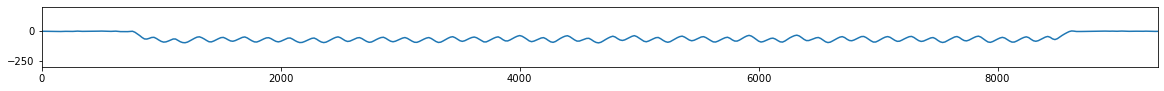

In [31]:
import matplotlib.pyplot as plt
import numpy as np

xScaled = np.multiply(xVal, 1000)

plt.close()
plt.figure(figsize=(20,10))
plt.plot(xScaled, yVal)
plt.xlim(0, max(xScaled))
plt.ylim(-300, 200)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

# Write the JS code with xVal and yVal coordinates

In [32]:
txt = 'var data = [];\n'
txt += 'function Points(x, y) {\n'
txt += '\tthis.x = x;\n'
txt += '\tthis.y = y;\n'
txt += '}\n'
txt += '\n'

for i in range(len(xVal)):
    txt += 'data[' + str(i) + '] = new Points(' + str(xVal[i]) + ', ' + str(yVal[i]) + ');\n'

f= open(path + "script.js","w+")
f.write(txt)
f.close()